In [32]:
import h2o
import matplotlib.pyplot as plt

In [42]:
import numpy as np

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 days 21 hours 49 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,1 month and 8 days
H2O cluster name:,H2O_from_python_felix_nh59a7
H2O cluster total nodes:,1
H2O cluster free memory:,2.526 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


In [16]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"

In [17]:
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
data.summary

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


<bound method H2OFrame.summary of >

## It will find out the csv files in the zip and integrate them

In [19]:
data.nrows

43978

In [20]:
#data["xxx"] = data["xxx"].asfactor()
#data["xxx"] = data["xxx"].asnumeric()

In [21]:
data[:, "AirTime"].mean()

[114.31611109078231]

In [22]:
data[:, "AirTime"].summary()

,AirTime
type,int
mins,14.0
mean,114.31611109078231
maxs,402.0
sigma,69.6363295150612
zeros,0
missing,16649
0,nan
1,nan
2,nan


In [25]:
data[:, "ArrDelay"].mean()

[9.317111936984306]

In [26]:
data[:,"AirTime"].any()

True

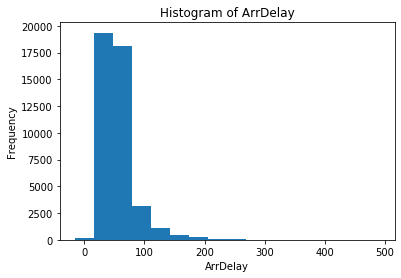

In [33]:
data[:, "ArrDelay"].hist() ### How to get the plot - IMPORT MATPLOTLIB.PYPLOT

In [28]:
data[:, "AirTime"].min() ### FIGURE OUT WHY NAN

nan

In [30]:
data[:, "AirTime"].max() ### FIGURE OUT WHY NAN

nan

## Much more details in R

In [34]:
names = data.col_names
print(names)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'IsArrDelayed', 'IsDepDelayed']


In [36]:
h2o_col_data_types = data.types ### gives column names and types

In [37]:
type(h2o_col_data_types)

dict

In [38]:
h2o_col_data_types.items()

dict_items([('Year', 'int'), ('Month', 'int'), ('DayofMonth', 'int'), ('DayOfWeek', 'int'), ('DepTime', 'int'), ('CRSDepTime', 'int'), ('ArrTime', 'int'), ('CRSArrTime', 'int'), ('UniqueCarrier', 'enum'), ('FlightNum', 'int'), ('TailNum', 'enum'), ('ActualElapsedTime', 'int'), ('CRSElapsedTime', 'int'), ('AirTime', 'int'), ('ArrDelay', 'int'), ('DepDelay', 'int'), ('Origin', 'enum'), ('Dest', 'enum'), ('Distance', 'int'), ('TaxiIn', 'int'), ('TaxiOut', 'int'), ('Cancelled', 'int'), ('CancellationCode', 'enum'), ('Diverted', 'int'), ('CarrierDelay', 'int'), ('WeatherDelay', 'int'), ('NASDelay', 'int'), ('SecurityDelay', 'int'), ('LateAircraftDelay', 'int'), ('IsArrDelayed', 'enum'), ('IsDepDelayed', 'enum')])

In [49]:
numeric_cols = []
for (k,v) in h2o_col_data_types.items():
    if(v in ('int')):
        numeric_cols.append(k)

In [50]:
numeric_cols

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [69]:
data[:, numeric_cols].cor(na_rm = True)

Year0,Month0,DayofMonth0,DayOfWeek0,DepTime0,CRSDepTime0,ArrTime0,CRSArrTime0,FlightNum0,ActualElapsedTime0,CRSElapsedTime0,AirTime0,ArrDelay0,DepDelay0,Distance0,TaxiIn0,TaxiOut0,Cancelled0,Diverted0,CarrierDelay0,WeatherDelay0,NASDelay0,SecurityDelay0,LateAircraftDelay0
1,nan,-0.664536,-0.309345,0.121292,0.0972266,0.0219463,0.0342699,0.473157,-0.264337,-0.223505,-0.216301,0.0891399,0.175092,-0.208214,-0.146233,-0.280481,nan,nan,0.101682,-0.0209128,-0.105734,0.065641,0.142477
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-0.664536,nan,1,0.287486,-0.0802609,-0.0633374,-0.000409899,-0.0108269,-0.347324,0.175167,0.150384,0.137488,-0.113678,-0.171547,0.132522,0.115446,0.211129,nan,nan,-0.0767239,-0.0065276,0.0397682,-0.0379528,-0.129418
-0.309345,nan,0.287486,1,0.0139748,0.00828311,0.0175544,0.0235917,-0.165113,0.120896,0.101776,0.097053,0.0793268,0.0501625,0.0936086,0.105407,0.123694,nan,nan,0.056536,0.00933613,0.0546912,0.00605974,0.0402713
0.121292,nan,-0.0802609,0.0139748,1,0.975368,0.669068,0.823679,0.0532476,-0.0726751,-0.0652516,-0.0688517,0.276133,0.315896,-0.0625703,-0.032852,-0.0278534,nan,nan,0.096295,0.0174806,0.0729599,-0.00978276,0.276524
0.0972266,nan,-0.0633374,0.00828311,0.975368,1,0.665211,0.819831,0.0419728,-0.0702992,-0.0623319,-0.0659285,0.1831,0.215315,-0.0565454,-0.0330239,-0.0301924,nan,nan,0.0384242,0.00778138,0.0374143,-0.0136421,0.20319
0.0219463,nan,-0.000409899,0.0175544,0.669068,0.665211,1,0.811224,0.0084607,0.00137874,-0.00856521,-0.00448579,0.106632,0.0985671,-0.00826978,0.023399,0.0238393,nan,nan,0.00394362,-0.00498543,0.0973366,-0.00691238,0.0551061
0.0342699,nan,-0.0108269,0.0235917,0.823679,0.819831,0.811224,1,0.00398372,0.0165239,0.0197992,0.0169332,0.18319,0.205415,0.0247012,-0.0140355,0.00759744,nan,nan,0.038087,0.0117582,0.0564342,-0.0144223,0.186674
0.473157,nan,-0.347324,-0.165113,0.0532476,0.0419728,0.0084607,0.00398372,1,-0.149701,-0.133393,-0.127297,0.0531842,0.089938,-0.124658,-0.0846019,-0.131485,nan,nan,0.0513506,-0.00644238,-0.0495527,0.0275006,0.0711738
-0.264337,nan,0.175167,0.120896,-0.0726751,-0.0702992,0.00137874,0.0165239,-0.149701,1,0.971821,0.982445,0.0745244,0.0123289,0.956521,0.20382,0.285122,nan,nan,0.0256594,0.0315045,0.189992,0.00800131,-0.0310927


In [72]:
?data.cor

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


In [70]:
data[:, ["Year", "Month", "ArrDelay", "DepDelay", "ArrTime", "Cancelled", "Diverted"]].cor(na_rm=True )
## NOTE THE DIFFERENCE IN CORRELATION SCORE BETWEEN YEAR AND ARRDELAY ABOVE AND HERE
## Even ARRTIME. Something is wrong ????

Year0,Month0,ArrDelay0,DepDelay0,ArrTime0,Cancelled0,Diverted0
1,-0.363365,0.0113168,0.0599453,0.0438349,nan,nan
-0.363365,1,0.0349101,-0.0116784,-0.0116997,nan,nan
0.0113168,0.0349101,1,0.897569,0.0881878,nan,nan
0.0599453,-0.0116784,0.897569,1,0.0976412,nan,nan
0.0438349,-0.0116997,0.0881878,0.0976412,1,nan,nan
nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan


In [67]:
data[:, ["Year", "ArrDelay"]].cor(na_rm = True)

Year0,ArrDelay0
1,0.0113168
0.0113168,1


In [65]:
data[:, "Cancelled"].summary()

,Cancelled
type,int
mins,0.0
mean,0.024694165264450407
maxs,1.0
sigma,0.15519314135784237
zeros,42892
missing,0
0,0.0
1,0.0
2,0.0


In [54]:
data[:, "Month"].summary()

,Month
type,int
mins,1.0
mean,1.409090909090916
maxs,10.0
sigma,1.8747113713439618
zeros,0
missing,0
0,10.0
1,10.0
2,10.0


In [58]:
data[:, "Month"].head()
data[:, "Month"].tail()

Month
1
1
1
1
1
1
1
1
1
1
